# Machine Learning 101 | WarwickHACK 2021

## Introduction

### Where Am I?

[Google Colab](https://colab.research.google.com/) is an online platform for running Python code without needing to install any software. You just need to sign in with a Google account and you're good to go. All _notebooks_ are saved to your Google Drive.

### Session Content

- What is machine learning?
- Decision trees and random forests
- Fitting a machine learning model
- Model tuning and measuring performance

### Teaching Style

- Interactive
- Practical
- Light
- Focus on exploration rather than memorisation

### Warwick Data Science Society

![WDSS banner](images/wdss_banner.jpg)

Follow WDSS on [Facebook](https://link.wdss.io/facebook), [LinkedIn](https://link.wdss.io/linkedin), and [YouTube](https://link.wdss.io/youtube) for:
- Numerous high-quality, free teaching courses on Python, R, Julia, SQL, etc.
- Regular events with high-profile speakers from academia and industry
- Student-led talks and workshops
- Interdisciplinary research projects

Elections are coming up and there are many non-technical roles. Check them out [here](https://www.facebook.com/warwickdatasciencesociety/posts/573623496854004).

Structure:
- Introduction/promotion of WDSS
- What is machine learning?
- Decision trees and random forests
- Preparing our data
- How do we know our model is working?
- Who can get the best model?

### More Like This

- [Python and a Piece of Paper](https://github.com/THargreaves/python-and-a-piece-of-paper) with Warwick Women in Finance
- WDSS [Data Science Beginner's Tasters](https://www.youtube.com/playlist?list=PLZOhGHnc4_7E8HwYWomqwBUXEnv4rqTWc)

## What is Machine Learning?

_How much do you know about machine learning?_

### At a High Level

Algorithms based on statistical methods to automatically find patterns and trends in data.

Examples:
- Recommendation systems
- Computer vision
- Reinforcement learning
- Dimensionality reduction
- Clustering

### Machine Learning Terminology

There are loosely two (main) types of machine learning.

|   Characteristics   |       Supervised Learning      |           Unsupervised Learning          |
|:-------------------:|:------------------------------:|:----------------------------------------:|
|   **Data Source**   |    Learn from labelled data    |        Learn from unlabelled data        |
|    **Objective**    | Predicting labels for new data | Finding patterns/trends in existing data |
|     **Example**     |        Image recognition       |           Clustering customers           |
|    **Popularity**   |    Well-studied and utilised   |    Less popular but full of potential    |

![](images/learning_types.png)

_Image source: [lawtomated.com](https://lawtomated.com/)_

In this session we will be focusing on supervised learning.

We can further split supervised learning into two (main) categories:

1. **Regression**: Predicting a continuous value such as the price of a car
2. **Classification**: Predicting a category such as type of house

![](images/supervised_types.png)

_Image source: [javatpoint](https://www.javatpoint.com/)_

_Any other examples?_

When performing supervised machine learning, we aim to learn how to predict a label for each data point. We call the value we are trying to predict the response variable and the values we are using to predict with the predictor variables.

## Decision Trees and Random Forests

There are many machine learning models to choose from, but we will focus on one known as random forests for the following reasons:
- Can be applied to both regression and classification
- Works for a wide variety of data types
- Performs well without much tuning of model
- Generalises fairly well to unseen data

### Decision Trees

![](images/decision_trees.png)

_Image source: [displayr.com](https://www.displayr.com/)_

The decision tree above was generated manually. The goal of a decision tree machine learning model is to learn what the best tree is.

> **Technical Detail**
>
> How is this done?
> 
> Figure out which variable has the most potential to split the labels of the data and then find the optimal split. Wash-rinse-repeat.

[Visual walkthrough](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/)

Decision trees can also be used for regression. In this case, each "leaf" has a number rather than a category.

Problems with decision trees: potential to _overfit_ and memorise the data they are trained with.

![](images/overfitting_tree.png)

### Random Forests

Random forests are, as the name suggests, a collection of decision trees:

- Each tree is trained on only a subset of the predictors and the observations
- Makes it harder to memorise data and overfit
- When new observations are provided, each tree _votes_ on what they think the label is

More trees generally result in better predictions (flattening out in the limit) but take longer to train.

## Fitting a Machine Learning Model

### Setup

Why reinvent the wheel? Python comes with an incredible array of packages for data manipulation, visualisation and machine learning. We just have to import them.

In [1]:
import numpy as np  # maths
import pandas as pd  # data manipulation
import matplotlib.pyplot as plt  # visualisation

# Machine learning
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

When using Python, we need to be aware of the following facts:
- Python is case-sensitive
- Python generally doesn't care about spaces and newlines
- We can run a code cell using the play button or `ctrl-enter`

### The Data

In this session we will look at a dataset giving numerous characteristics of US adults and whether they earn over \$50K. This is taken from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Adult) but a cleaned and processed version can be found [here](https://github.com/THargreaves/machine-learning-101/raw/master/adult.csv). You need to download this to you computer and upload it to Google Colab.

In [2]:
# Column names not included in dataset so we add them manually
column_names = (
    'age', 'workclass', 'fnlwgt', 'education', 'education-num', 
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
    'income'
)
# Import the dataset and save it as `income_df`
income_df = pd.read_csv('adult.csv', names=column_names, na_values='?')

The dataset comes with two columns that we don't need, `fnlwgt` and `education`. Let's remove these.

In [3]:
# Drop unnecessary columns
income_df = income_df.drop(['fnlwgt', 'education'], axis=1)

What does this data set look like?

In [4]:
# Dimensions of data
income_df.shape

(48842, 13)

In [5]:
# First few rows of data
income_df.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50.0,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38.0,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53.0,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28.0,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


_What factors do you think will be the most important?_

In [6]:
# Datatypes of columns (float64 => decimal, object => text)
income_df.dtypes

age               float64
workclass          object
education-num       int64
marital-status     object
occupation         object
relationship       object
race               object
sex                object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [7]:
# Summaries of numeric columns
income_df.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,48840.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643919,10.078089,1079.067626,87.502314,40.422382
std,13.710691,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [8]:
# Unique values in `native-country` column
income_df['native-country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', nan, 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

We can also create plots of the data.

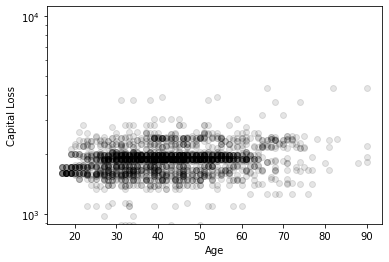

In [9]:
# Plot capital losses on a log scale against age
fig, ax = plt.subplots()
ax.scatter(income_df['age'], income_df['capital-loss'],
          c='black', alpha=0.1)
ax.set_yscale('log')
ax.set_xlabel('Age')
ax.set_ylabel('Capital Loss')
plt.show()

Let's split our predictors and response variables. Typically, we call the predictors `X` and the response `y`.

In [10]:
# Split into predictors and response
X = income_df.drop('income', axis=1)
y = income_df['income']

### Cleaning

Our dataset has missing values. Where are they?

In [11]:
# Find the missing values
X.isna().any()

age                True
workclass          True
education-num     False
marital-status    False
occupation         True
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country     True
dtype: bool

We have missing values in both numeric and text columns. Let's starting by replacing missing numeric values with the column mean.

In [12]:
# Replace missing numeric values with column mean
X = X.fillna(X.mean())

For the text columns, there is no mean, so instead we use the column mode (most common value).

In [13]:
# Replace with column modes
for name, values in X.iteritems():
    if values.dtype == 'object':
        X[name] = values.fillna(values.value_counts().index[0])

Let's check that all missing values are gone.

In [14]:
# Find the missing values
X.isna().any()

age               False
workclass         False
education-num     False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
dtype: bool

> For a deeper discussion on how to handle missing values, check out [episode 5](https://youtu.be/BIoFwGl2Vtc?t=1150) of WDSS's podcast [DataBasic](https://podcast.wdss.io/).

### Encoding

Machine learning models almost exclusively work with numbers. This means that we need to encode our text columns into a numeric form. There are multiple ways to do this, but the most common is known as one-hot encoding.

![](images/one_hot_enc.png)

Lucky for us, `sklearn` has a function for doing exactly this

In [15]:
# Split numeric and text columns
numeric = X.select_dtypes(exclude='object')
text = X.select_dtypes(include='object')

In [16]:
# One-hot encode text colums
enc = OneHotEncoder()
text_enc = enc.fit_transform(text)

In [17]:
# Recombine variables
X_enc = np.hstack((numeric.to_numpy(), text_enc.todense()))

In [18]:
# Get new column names
enc_columns = np.concatenate([numeric.columns, enc.get_feature_names(text.columns)])

What does `X_enc` look like? Notice, it no longer needs to be a dataframe because all of the values are numeric.

In [19]:
X_enc

matrix([[3.900e+01, 1.300e+01, 2.174e+03, ..., 1.000e+00, 0.000e+00,
         0.000e+00],
        [5.000e+01, 1.300e+01, 0.000e+00, ..., 1.000e+00, 0.000e+00,
         0.000e+00],
        [3.800e+01, 9.000e+00, 0.000e+00, ..., 1.000e+00, 0.000e+00,
         0.000e+00],
        ...,
        [3.800e+01, 1.300e+01, 0.000e+00, ..., 1.000e+00, 0.000e+00,
         0.000e+00],
        [4.400e+01, 1.300e+01, 5.455e+03, ..., 1.000e+00, 0.000e+00,
         0.000e+00],
        [3.500e+01, 1.300e+01, 0.000e+00, ..., 1.000e+00, 0.000e+00,
         0.000e+00]])

We also need to encode `y` so that it has value zero if income is over \$50K and zero otherwise.

In [20]:
# Encode y
y_enc = (y == '<=50K').astype('int')

### Train-test Split

How can we make sure that our model isn't overfitting?

- We split our dataset into two parts
- We train on the first part
- Then evaluate on the second part
- If the model only memorised the first part, it will be useless on the unseen second

We use `sklearn`'s `train_test_split` to do this.

In [21]:
# Create training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(
    X_enc, y_enc, test_size=0.2, random_state=2021
)

Before we fit our model, it is important to have a baseline benchmark. The most simple model we could make would be to ignore the predictors and just predict the most common response for every observation.

In [22]:
y_test.value_counts()

1    7399
0    2370
Name: income, dtype: int64

Looking at the counts of each value in `y_test` we see that this would have an accuracy of roughly 75%.

### Model Building

We are now ready to build a model and fit it to our training data.

In [23]:
# Build the model
clf = RandomForestClassifier()

In [24]:
# Fit model to training data
clf = clf.fit(X_train, y_train)

Finally, we can make predictions on both the training set and test set.

In [25]:
# Make predictions
pred_train = clf.predict(X_train)
pred_test = clf.predict(X_test)

It is also interesting to ask what predictors the model thought were most important.

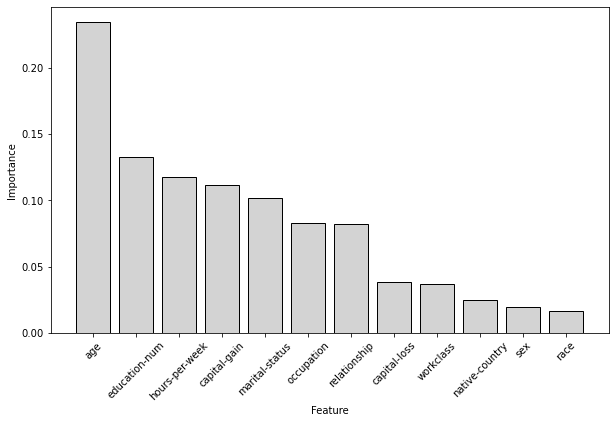

In [29]:
# Plot feature importances
importances = pd.DataFrame({
    'feature': enc_columns,
    'importance': clf.feature_importances_
})
importances['predictor'] = importances.feature.str.extract(r'^([^_]+)')
importances = importances.groupby('predictor',
                                  as_index=False)['importance'].sum()
importances.sort_values('importance', inplace=True, ascending=False)
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(importances.predictor, importances.importance,
       edgecolor='black', color='lightgray')
ax.tick_params('x', rotation=45, h)
ax.set_xlabel("Feature")
ax.set_ylabel("Importance")
plt.show()

## Model Tuning and Measuring Performance

We can start by computing train and test set accuracy.

In [27]:
# Compute accuracies
print("Train set accuracy:", (pred_train == y_train).mean())
print("Test set accuracy:", (pred_test == y_test).mean())

Train set accuracy: 0.9739717963811327
Test set accuracy: 0.8490121813901116


Even better, we can plot a confusion matrix, which shows where our model was making mistakes.

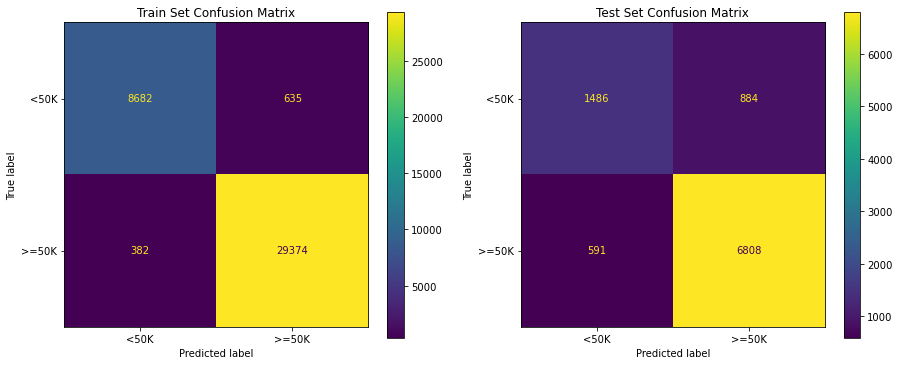

In [28]:
# Plot confusion matrices
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
# Train set
cm = confusion_matrix(y_train, pred_train)
disp = ConfusionMatrixDisplay(cm, display_labels = ('<50K', '>=50K'))
disp.plot(ax=ax1)
ax1.set_title('Train Set Confusion Matrix')
# Test set
cm = confusion_matrix(y_test, pred_test)
disp = ConfusionMatrixDisplay(cm, display_labels = ('<50K', '>=50K'))
disp.plot(ax=ax2)
ax2.set_title('Test Set Confusion Matrix')
# Show plot
plt.show()

It appears that our model is drastically overfitting. This is likely because our trees are too complex.

![](images/model_complexity.png)

Let's read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) for `RandomForestClassifier` and try to correct this.

_How well can you do?_